In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [7]:
#imports for feature extraction
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
import spacy
import textstat

In [8]:
import joblib

In [9]:
df=pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv')

In [10]:
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [11]:
df.columns

Index(['Tweet', 'Suicide'], dtype='object')

<Axes: xlabel='Suicide'>

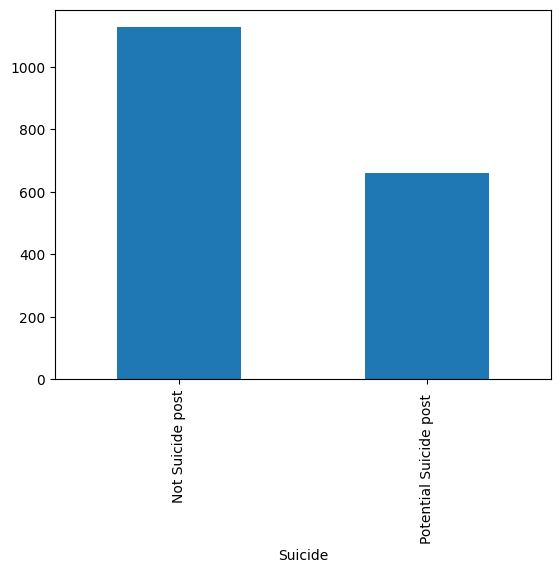

In [12]:
df['Suicide'].value_counts().plot(kind='bar')

In [13]:
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

In [16]:
def lower_Case(text):
    return text.lower()

In [17]:
df['Tweet']=df['Tweet'].apply(lower_Case)

In [18]:
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@alexia you want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets hey jer! since when did y...,Not Suicide post
4,trying out &quot;delicious library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my nokia n95-1,Not Suicide post
1783,starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [19]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [20]:
df['Tweet']=df['Tweet'].apply(remove_punctuation)

In [21]:
def remove_numbers(text):
    return text.translate(str.maketrans('', '', string.digits))

In [22]:
df['Tweet']=df['Tweet'].apply(remove_numbers)

In [23]:
def remove_extra_spaces(text):
    ans = " ".join(text.split())
    return ans

In [24]:
df['Tweet']=df['Tweet'].apply(remove_extra_spaces)

In [25]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" #emotions
                           u"\U0001F300-\U0001F5FF" #sumbols and pictographs
                           u"\U0001F680-\U0001F6FF" #transport and map symbols
                           u"\U0001F1E0-\U0001F1FF" #flags
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251" 

                           "]+",flags = re.UNICODE)

    return emoji_pattern.sub(r'', string)

In [26]:
df['Tweet']=df['Tweet'].apply(remove_emoji)

In [27]:
#load the stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english')  

In [28]:
import nltk


def remove_stop_words(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    clean_tokens = [token for token in tokens if token not in stop_words]

    # Join the clean tokens into a single string
    clean_text = ' '.join(clean_tokens)

    return clean_text

In [29]:
df['Tweet']=df['Tweet'].apply(remove_stop_words)

In [30]:
df

,Tweet,Suicide
0,making lunch,Not Suicide post
1,alexia want money,Not Suicide post
2,dizzyhrvy crap took forever put together iâm...,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post
4,trying quotdelicious library quot mixed result...,Not Suicide post
...,...,...
1782,forgotten much love nokia n,Not Suicide post
1783,starting day positive attitude great watch gre...,Not Suicide post
1784,belledame hey amgive girl credit trying,Not Suicide post
1785,drunken besties stumble room run around sober ...,Not Suicide post


In [31]:
def remove_quotes(text):
    return re.sub(r"[’']", "", text) if isinstance(text, str) else text

# Apply to entire 'text' column
df['Tweet'] = df['Tweet'].apply(remove_quotes)

In [32]:
def remove_URL(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", text)
df['Tweet'] = df['Tweet'].apply(remove_URL)

In [33]:
def lemetize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['Tweet'] = df['Tweet'].apply(lemetize)

In [34]:
le=LabelEncoder()
df['Suicide']=le.fit_transform(df['Suicide'])

In [35]:
df

,Tweet,Suicide
0,making lunch,0
1,alexia want money,0
2,dizzyhrvy crap took forever put together iâm...,1
3,jnaylor kiwitweets hey jer since start twittering,0
4,trying quotdelicious library quot mixed result...,0
...,...,...
1782,forgotten much love nokia n,0
1783,starting day positive attitude great watch gre...,0
1784,belledame hey amgive girl credit trying,0
1785,drunken besties stumble room run around sober ...,0


Applying Bow

In [36]:
X=df['Tweet']
Y=df['Suicide']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
pipe_bow_lr=Pipeline([
    ('cv',CountVectorizer()),
    ('lr',LogisticRegression())
])

In [39]:
pipe_bow_lr.fit(X_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
pipe_bow_lr.score(X_test,Y_test)

0.9215686274509803

In [41]:
pipe_bow_lr.predict(["I feel like there's no way out, and nothing seems to matter anymore. I just want the pain to stop"])

array([1])

In [42]:
pipe_bow_lr.predict(["I can't take this pain anymore. I feel so alone and hopeless."])

array([1])

In [43]:
pipe_bow_lr.predict(["Life feels meaningless, and I don’t see any reason to keep going."])

array([0])

In [44]:
pipe_bow_lr.predict(["I'm tired of pretending everything is okay when it's not."])

array([0])

In [45]:
pipe_bow_lr.predict(["Maybe everyone would be better off without me."])

array([0])

In [46]:
pipe_tfidf_lr=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lr',LogisticRegression())
])

In [47]:
pipe_tfidf_lr.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [48]:
pipe_tfidf_lr.score(X_test,Y_test)

0.8907563025210085

In [49]:
pipe_tfidf_lr.predict(["Maybe everyone would be better off without me."])

array([0])

In [50]:
pipe_tfidf_lr.predict(["Life feels meaningless, and I don’t see any reason to keep going."])

array([0])

In [51]:
pipe_tfidf_lr.predict(["izzyhrvy crap took forever put together"])

array([0])

rf+bow

In [52]:
pipe_bow_rf=Pipeline([
    ('cv',CountVectorizer()),
    ('rf',RandomForestClassifier())
])

In [53]:
pipe_bow_rf.fit(X_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [54]:
pipe_bow_rf.score(X_test,Y_test)

0.8823529411764706

In [55]:
pipe_bow_rf.predict(["Maybe everyone would be better off without me."])

array([0])

In [56]:
pipe_bow_rf.predict(["I feel like there's no way out, and nothing seems to matter anymore. I just want the pain to stop"])

array([1])

rf+tfidf

In [57]:
pipe_tfidf_rf=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rf',RandomForestClassifier())
])

In [58]:
pipe_tfidf_rf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [59]:
pipe_tfidf_rf.score(X_test,Y_test)

0.8571428571428571

In [60]:
pipe_tfidf_rf.predict(["Maybe everyone would be better off without me."])

array([0])

In [61]:
pipe_tfidf_rf.predict(["I feel like there's no way out, and nothing seems to matter anymore. I just want the pain to stop"])

array([1])

dt+bow

In [62]:

pipe_bow_dt=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [63]:
pipe_bow_dt.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('dt', DecisionTreeClassifier())])

In [64]:
pipe_bow_dt.score(X_test,Y_test)

0.8123249299719888

In [65]:
pipe_bow_dt.predict(["Maybe everyone would be better off without me."])

array([0])

In [66]:
pipe_bow_dt.predict(["I feel like there's no way out, and nothing seems to matter anymore. I just want the pain to stop"])

array([1])

dt+tfidf

In [67]:
pipe_tfidf_dt=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [68]:
pipe_tfidf_dt.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('dt', DecisionTreeClassifier())])

In [69]:
pipe_tfidf_dt.score(X_test,Y_test)

0.7927170868347339

In [70]:
pipe_tfidf_dt.predict(["Maybe everyone would be better off without me."])

array([0])

doing advnaced feature engineering

In [ ]:


nlp = spacy.load("en_core_web_sm")

def extract_text_features(text):
    # Tokenization
    sentences = sent_tokenize(text)  
    words = word_tokenize(text)  
    words_filtered = [word.lower() for word in words if word.isalpha()]  

    # POS Tagging
    pos_tags = pos_tag(words_filtered)
    doc = nlp(text)

    # Feature Extraction
    features = {
        "num_sentences": len(sentences),  # Number of sentences
        "max_word_frequency": max(Counter(words_filtered).values(), default=0),  # Max frequency of a word
        "num_non_word_chars": len(re.findall(r'\W', text)),  # Non-word characters
        "std_word_length": (sum((len(w) - (sum(len(w) for w in words_filtered) / len(words_filtered)))**2 for w in words_filtered) / len(words_filtered))**0.5 if words_filtered else 0,  # Standard deviation of word length
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),  # Flesch-Kincaid grade level
        "cardinal_numbers": sum(1 for token in doc if token.like_num),  # Cardinal numbers
        "verb_past_tense": sum(1 for word, tag in pos_tags if tag == "VBD"),  # Past tense verbs
        "personal_pronouns": sum(1 for word, tag in pos_tags if tag in ["PRP", "PRP$"]),  # Personal pronouns
        "flesch_reading_ease": textstat.flesch_reading_ease(text),  # Flesch reading ease
        "num_paragraphs": text.count("\n\n") + 1,  # Approximate paragraph count
        "num_tokens": len(words),  # Number of tokens
        "num_words": len(words_filtered),  # Number of words (excluding punctuation)
        "adj_superlative": sum(1 for word, tag in pos_tags if tag == "JJS"),  # Superlative adjectives
        "verb_non_3rd_singular_present": sum(1 for word, tag in pos_tags if tag == "VBP")  # Non-3rd person singular present verbs
    }
    
    return features


In [72]:

# Apply feature extraction
data_features = df["Tweet"].apply(extract_text_features).apply(pd.Series)

# Combine with original dataset
df_with_features = pd.concat([df, data_features], axis=1)

print(df_with_features.head())

                                               Tweet  Suicide  num_sentences  \
0                                       making lunch        0            1.0   
1                                  alexia want money        0            1.0   
2  dizzyhrvy crap took forever put together iâm...        1            1.0   
3  jnaylor kiwitweets hey jer since start twittering        0            1.0   
4  trying quotdelicious library quot mixed result...        0            1.0   

   max_word_frequency  num_non_word_chars  std_word_length  \
0                 1.0                 1.0         0.500000   
1                 1.0                 2.0         0.816497   
2                 1.0                12.0         2.190890   
3                 1.0                 6.0         2.747912   
4                 1.0                17.0         2.370081   

   flesch_kincaid_grade  cardinal_numbers  verb_past_tense  personal_pronouns  \
0                   2.9               0.0              0.0       

In [73]:
df_with_features

,Tweet,Suicide,num_sentences,max_word_frequency,num_non_word_chars,std_word_length,flesch_kincaid_grade,cardinal_numbers,verb_past_tense,personal_pronouns,flesch_reading_ease,num_paragraphs,num_tokens,num_words,adj_superlative,verb_non_3rd_singular_present
0,making lunch,0,1.0,1.0,1.0,0.500000,2.9,0.0,0.0,0.0,77.91,1.0,2.0,2.0,0.0,0.0
1,alexia want money,0,1.0,1.0,2.0,0.816497,12.7,0.0,0.0,0.0,9.21,1.0,3.0,3.0,0.0,1.0
2,dizzyhrvy crap took forever put together iâm...,1,1.0,1.0,12.0,2.190890,6.4,0.0,1.0,0.0,68.77,1.0,11.0,10.0,0.0,0.0
3,jnaylor kiwitweets hey jer since start twittering,0,1.0,1.0,6.0,2.747912,6.0,0.0,0.0,0.0,64.37,1.0,7.0,7.0,0.0,1.0
4,trying quotdelicious library quot mixed result...,0,1.0,1.0,17.0,2.370081,9.1,0.0,1.0,0.0,61.67,1.0,18.0,18.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,forgotten much love nokia n,0,1.0,1.0,4.0,2.576820,7.6,0.0,0.0,0.0,49.48,1.0,5.0,5.0,0.0,0.0
1783,starting day positive attitude great watch gre...,0,1.0,1.0,6.0,2.060315,9.6,0.0,0.0,0.0,38.99,1.0,7.0,7.0,0.0,0.0
1784,belledame hey amgive girl credit trying,0,1.0,1.0,5.0,1.885618,4.5,0.0,0.0,0.0,73.85,1.0,6.0,6.0,0.0,0.0
1785,drunken besties stumble room run around sober ...,0,1.0,1.0,13.0,1.690309,6.4,0.0,0.0,0.0,74.19,1.0,14.0,14.0,0.0,1.0


In [74]:
X_with_features = df_with_features.drop(columns=["Suicide"])
Y_with_features = df_with_features["Suicide"]

In [75]:
X_with_features

,Tweet,num_sentences,max_word_frequency,num_non_word_chars,std_word_length,flesch_kincaid_grade,cardinal_numbers,verb_past_tense,personal_pronouns,flesch_reading_ease,num_paragraphs,num_tokens,num_words,adj_superlative,verb_non_3rd_singular_present
0,making lunch,1.0,1.0,1.0,0.500000,2.9,0.0,0.0,0.0,77.91,1.0,2.0,2.0,0.0,0.0
1,alexia want money,1.0,1.0,2.0,0.816497,12.7,0.0,0.0,0.0,9.21,1.0,3.0,3.0,0.0,1.0
2,dizzyhrvy crap took forever put together iâm...,1.0,1.0,12.0,2.190890,6.4,0.0,1.0,0.0,68.77,1.0,11.0,10.0,0.0,0.0
3,jnaylor kiwitweets hey jer since start twittering,1.0,1.0,6.0,2.747912,6.0,0.0,0.0,0.0,64.37,1.0,7.0,7.0,0.0,1.0
4,trying quotdelicious library quot mixed result...,1.0,1.0,17.0,2.370081,9.1,0.0,1.0,0.0,61.67,1.0,18.0,18.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,forgotten much love nokia n,1.0,1.0,4.0,2.576820,7.6,0.0,0.0,0.0,49.48,1.0,5.0,5.0,0.0,0.0
1783,starting day positive attitude great watch gre...,1.0,1.0,6.0,2.060315,9.6,0.0,0.0,0.0,38.99,1.0,7.0,7.0,0.0,0.0
1784,belledame hey amgive girl credit trying,1.0,1.0,5.0,1.885618,4.5,0.0,0.0,0.0,73.85,1.0,6.0,6.0,0.0,0.0
1785,drunken besties stumble room run around sober ...,1.0,1.0,13.0,1.690309,6.4,0.0,0.0,0.0,74.19,1.0,14.0,14.0,0.0,1.0


In [76]:
Y_with_features

0       0
1       0
2       1
3       0
4       0
       ..
1782    0
1783    0
1784    0
1785    0
1786    0
Name: Suicide, Length: 1785, dtype: int32

In [77]:
X_with_features.shape

(1785, 15)

In [78]:
Y_with_features.shape

(1785,)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

In [80]:
X_train_f,X_test_f,Y_train_f,Y_test_f = train_test_split(X_with_features,Y_with_features.values,test_size=0.2,random_state=1)
count_vectorizer.fit(X_train_f,Y_train_f)

CountVectorizer()

In [81]:
print(X_train_f.shape)
print(Y_train_f.shape)


(1428, 15)
(1428,)


In [82]:
print(X_test_f.shape)
print(Y_test_f.shape)

(357, 15)
(357,)


In [83]:
X_train_f

,Tweet,num_sentences,max_word_frequency,num_non_word_chars,std_word_length,flesch_kincaid_grade,cardinal_numbers,verb_past_tense,personal_pronouns,flesch_reading_ease,num_paragraphs,num_tokens,num_words,adj_superlative,verb_non_3rd_singular_present
288,lfta blur song,1.0,1.0,2.0,0.000000,0.9,0.0,0.0,0.0,93.81,1.0,3.0,3.0,0.0,0.0
104,wanicullen thanks wani,1.0,1.0,2.0,2.494438,0.9,0.0,0.0,0.0,93.81,1.0,3.0,3.0,0.0,1.0
236,ah pop good,1.0,1.0,2.0,0.816497,-2.7,0.0,0.0,0.0,119.19,1.0,3.0,3.0,0.0,0.0
1550,weinerburger haha alright ended paying abt yes...,1.0,1.0,13.0,2.390457,7.6,0.0,1.0,0.0,65.73,1.0,14.0,14.0,0.0,0.0
1448,bensummers isnt sweet altruism finest,1.0,1.0,4.0,2.154066,14.7,0.0,0.0,0.0,-1.29,1.0,5.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,overwhelmed enjoy,1.0,1.0,1.0,3.000000,14.7,0.0,0.0,0.0,-6.70,1.0,2.0,2.0,0.0,0.0
906,goodnight really want fucking kill,1.0,1.0,4.0,1.897367,5.2,0.0,0.0,0.0,66.40,1.0,5.0,5.0,0.0,0.0
1098,iâm tired living regular life ð¤£,1.0,1.0,10.0,1.118034,6.8,0.0,0.0,0.0,56.93,1.0,6.0,4.0,0.0,0.0
235,rt mileycyrus completely devestated fire affec...,1.0,2.0,15.0,2.947268,15.8,2.0,1.0,0.0,6.50,1.0,14.0,13.0,0.0,0.0


In [86]:
X_train_f.columns

Index(['Tweet', 'num_sentences', 'max_word_frequency', 'num_non_word_chars',
       'std_word_length', 'flesch_kincaid_grade', 'cardinal_numbers',
       'verb_past_tense', 'personal_pronouns', 'flesch_reading_ease',
       'num_paragraphs', 'num_tokens', 'num_words', 'adj_superlative',
       'verb_non_3rd_singular_present'],
      dtype='object')

In [96]:

# Example pipeline configuration

text_features = 'Tweet'  # Replace with the actual name of your text column
additional_features = ['num_sentences', 'max_word_frequency', 'num_non_word_chars',
       'std_word_length', 'flesch_kincaid_grade', 'cardinal_numbers',
       'verb_past_tense', 'personal_pronouns', 'flesch_reading_ease',
       'num_paragraphs', 'num_tokens', 'num_words', 'adj_superlative',
       'verb_non_3rd_singular_present']  # Replace with actual feature names

preprocessor_bow = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), text_features),
        ('num', StandardScaler(), additional_features)
    ])




In [97]:
pipe_bow_lr_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_bow),
    ('classifier', LogisticRegression())
])

In [98]:
# Fit the pipeline
pipe_bow_lr_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', LogisticRegression())])

In [105]:
lr_with_features_score_bow=pipe_bow_lr_with_features.score(X_test_f,Y_test_f)
print(lr_with_features_score_bow)

0.9299719887955182


In [100]:
preprocessor_tfidf = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), text_features),
        ('num', StandardScaler(), additional_features)
    ])


In [103]:
pipe_tfidf_lr_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_tfidf),
    ('classifier', LogisticRegression())
])

In [104]:
pipe_tfidf_lr_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', LogisticRegression())])

In [106]:
lr_with_features_score_tfidf=pipe_tfidf_lr_with_features.score(X_test_f,Y_test_f)
print(lr_with_features_score_tfidf)

0.9103641456582633


rf+bow+features

In [113]:
pipe_bow_rf_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_bow),
    ('classifier', RandomForestClassifier())
])

In [114]:
pipe_bow_rf_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', RandomForestClassifier())])

In [115]:
rf_with_features_score_bow=pipe_bow_rf_with_features.score(X_test_f,Y_test_f)
print(rf_with_features_score_bow)

0.9327731092436975


rf+tfidf+features

In [107]:
pipe_tfidf_rf_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_tfidf),
    ('classifier', RandomForestClassifier())
])

In [108]:
pipe_tfidf_rf_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', RandomForestClassifier())])

In [109]:
rf_with_features_score_tfidf=pipe_tfidf_rf_with_features.score(X_test_f,Y_test_f)
print(rf_with_features_score_tfidf)

0.9355742296918768


dt+bow+features

In [116]:
pipe_bow_dt_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_bow),
    ('classifier', DecisionTreeClassifier())
])

In [117]:
pipe_bow_dt_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', DecisionTreeClassifier())])

In [118]:
dt_with_features_score_bow=pipe_bow_dt_with_features.score(X_test_f,Y_test_f)
print(dt_with_features_score_bow)

0.9355742296918768


dt+tfidf+features

In [110]:
pipe_tfidf_dt_with_features = Pipeline(steps=[
    ('preprocessor', preprocessor_tfidf),
    ('classifier', DecisionTreeClassifier())
])

In [111]:
pipe_tfidf_dt_with_features.fit(X_train_f, Y_train_f)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'Tweet'),
                                                 ('num', StandardScaler(),
                                                  ['num_sentences',
                                                   'max_word_frequency',
                                                   'num_non_word_chars',
                                                   'std_word_length',
                                                   'flesch_kincaid_grade',
                                                   'cardinal_numbers',
                                                   'verb_past_tense',
                                                   'personal_pronouns',
                                                   'flesch_reading_ease',
                                                   'num_paragraphs',
                                                   'num_tokens', 'num_words',
                                                   'adj_superlative',
                                                   'verb_non_3rd_singular_present'])])),
                ('classifier', DecisionTreeClassifier())])

In [112]:
dt_with_features_score_tfidf=pipe_tfidf_dt_with_features.score(X_test_f,Y_test_f)
print(dt_with_features_score_tfidf)

0.9215686274509803


going with lr bow no features

In [119]:
pipeline_file=open("suicide_pipeline.pkl","wb")
joblib.dump(pipe_bow_lr,pipeline_file)
pipeline_file.close()

In [120]:
ex2="I am not able to pass my exams. I do not want to go in rat race. I am going to end my life."
pipe_bow_lr.predict([ex2])

array([1])

In [121]:
first="A Lot of My Friends Are Toxic. Should I Leave Them? Additionally, How Should I Go About Making New Friends? "
pipe_bow_lr.predict([first])

array([0])

In [122]:
third="I just cried! I just cried for the first time in a year. It felt awesome. 4 years ago i was used to cry everyday but now it felt like i forgot how it felt. I almost attempted suicide when i was 13 because i got bullied for 6 years straight."
pipe_bow_lr.predict([third])

array([1])

In [123]:
second=f"Just a huge rantI thought I would share this because I been dealing with this for 3 years and I attempted suicide 6 times but people seriously need to stop it  now I made videos about this on my YouTube channel and videos on my Instagram and snapchat but people wont stop or leave me alone I never sleep from this either but I'm crying for help I'm not attention seeking or even fake and people saying I deserve depression do I deserve it NO I BEEN DEALING WITH THIS FOR 3 YEARS I BEEN TO HOSPITAL I CANT EVEN GET THERAPIST OR ANYTHING MY FAMILY THINKS IM ATTENTION SEEKER AND FAKE TOO I REALLY WANT TO FUCKING DIE ALREADY PLEASE STOP IT IM SOBBING I SHOULD KILL MYSELF AGES AGO IM SUCH A PATHETIC BITCH I have  no purpose here I'm worthless I was mistake  I just wish I was never born nobody never understands I should die"
pipe_bow_lr.predict([second])

array([1])

In [124]:
pipe_bow_lr.predict(["I’m feeling stressed about work, but I’ll get through it."])

array([0])